# airportdb Database Exploration

https://downloads.mysql.com/docs/airportdb-en.pdf
https://dev.mysql.com/doc/index-other.html
https://dev.mysql.com/doc/airportdb/en/airportdb-structure.html

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import json
import os
import glob
import warnings
from IPython import display
import pandas_profiling
from config import password
import psycopg2

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')  

path_directory = os.getcwd()                           # get the current working directory
warnings.simplefilter('ignore')                        # ignore simple warnings

# airportdb Structure

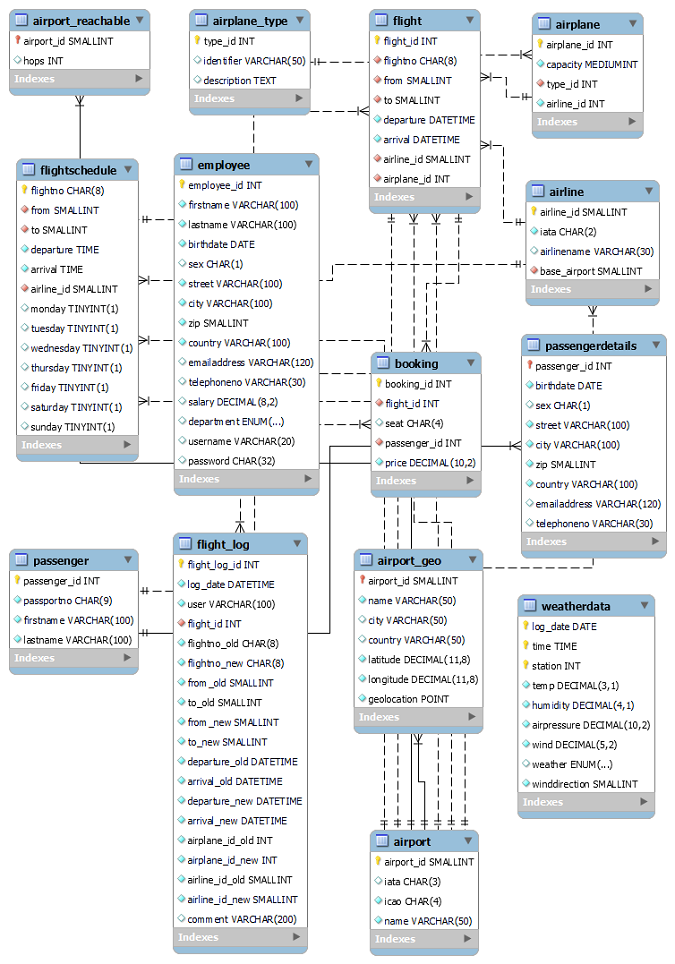

In [3]:
image_path = os.path.join(path_directory, 'images', 'airportdb-schema.png')

display.Image(image_path)

# Import Dataset Paths

In [4]:
json_path = os.path.join(path_directory, 'datasets', 'airport-db', '*.json')
json_files = glob.glob(json_path)

In [5]:
tsv_path = os.path.join(path_directory, 'datasets', 'airport-db', '*.zst')
tsv_files = glob.glob(tsv_path)

# Parse JSON Files

In [6]:
for file in json_files:
  tables = json.load(open(json_files[3]))['tables']
  airline_columns = json.load(open(json_files[4]))['options']['columns']
  airplane_columns = json.load(open(json_files[5]))['options']['columns']
  airplane_type_columns = json.load(open(json_files[6]))['options']['columns']
  airport_columns = json.load(open(json_files[7]))['options']['columns']
  airport_geo_columns = json.load(open(json_files[8]))['options']['columns']
  booking_columns = json.load(open(json_files[10]))['options']['columns']
  employee_columns = json.load(open(json_files[11]))['options']['columns']
  flight_columns = json.load(open(json_files[12]))['options']['columns']
  flightschedule_columns = json.load(open(json_files[13]))['options']['columns']
  passenger_columns = json.load(open(json_files[15]))['options']['columns']
  passengerdetails_columns = json.load(open(json_files[16]))['options']['columns']
  weatherdata_columns = json.load(open(json_files[17]))['options']['columns']


# Create Dataframes For TSV files

Create Airline Dataframe

In [7]:
airline_df = pd.read_table(tsv_files[0], header=None)
airline_df.columns = airline_columns
airline_df.head()

,airline_id,iata,airlinename,base_airport
0,1,AF,Afghanistan Airlines,850
1,2,AL,Albania Airlines,10274
2,3,AM,American Samoa Airli,9210
3,4,AN,Angola Airlines,190
4,5,AR,Argentina Airlines,285


Create Airplane Dataframe

In [8]:
airplane_df = pd.read_table(tsv_files[1], header=None)
airplane_df.columns = airplane_columns
airplane_df

,airplane_id,capacity,type_id,airline_id
0,1,150,228,89
1,2,200,38,89
2,3,380,60,89
3,4,50,232,89
4,5,335,21,89
...,...,...,...,...
5578,5579,50,232,108
5579,5580,50,232,108
5580,5581,335,21,108
5581,5582,150,228,108


Create Airplane Type Dataframe

In [9]:
airplane_type_df = pd.read_table(tsv_files[2], header=None)
airplane_type_df.columns = airplane_type_columns
airplane_type_df.head()

,type_id,identifier,description
0,1,Concorde,"Die ""Aérospatiale-BAC Concorde 101/102"", kurz..."
1,2,Tupolew Tu-144,"Die Tupolew Tu-144 (NATO-Codename: ""Charger"",..."
2,3,Ultraleichtflugzeug,Unter Ultraleichtflugzeugen (ULs) versteht ma...
3,4,Flugboot,"""Martin Chinaclipper"" Typ 130 Flugboot der 19..."
4,5,Dornier Do X,Zur Besatzung während des USA-Fluges gehörten...


Create Airport Dataframe

In [10]:
airport_df = pd.read_table(tsv_files[3], header=None)
airport_df.columns = airport_columns
airport_df

,airport_id,iata,icao,name
0,1,LCG,LECO,A CORUNA
1,2,\N,7Y7,A R S SPORT STRIP
2,3,TID,DAOB,A. BOUSSOUF AIN BOUCHEKIF
3,4,DIR,HADR,A.T.D. YILMA INTL
4,5,QUN,RKNC,A-306
...,...,...,...,...
9849,13593,EVN,UGEE,ZVARTNOTS
9850,13594,\N,HLZW,ZWARA
9851,13595,\N,EBZW,ZWARTBERG
9852,13596,\N,EDRZ,ZWEIBRUCKEN


Create Airport Geo Dataframe

In [11]:
airport_geo_df = pd.read_table(tsv_files[4], header=None)
airport_geo_df.columns = airport_geo_columns
airport_geo_df

,airport_id,name,city,country,latitude,longitude,geolocation
0,1,A CORUNA,A CORUNA,SPAIN,43.30194,-8.37722,AAAAAAEBAAAAmZzaGaamRUDWqfI9I8EgwA==
1,2,A R S SPORT STRIP,BELLE PLAINE,UNITED STATES,44.66667,-93.78361,AAAAAAEBAAAARSkhWFVVRkBLcsCuJnJXwA==
2,3,A. BOUSSOUF AIN BOUCHEKIF,TIARET,ALGERIA,35.34139,1.46694,AAAAAAEBAAAAaRt/orKrQUDJA5FFmnj3Pw==
3,4,A.T.D. YILMA INTL,DIRE DAWA,ETHIOPIA,9.61417,41.86000,AAAAAAEBAAAAm5DWGHQ6I0CuR+F6FO5EQA==
4,5,A-306,CHUNCHON,KOREA,37.88500,127.71500,AAAAAAEBAAAA4XoUrkfxQkD2KFyPwu1fQA==
...,...,...,...,...,...,...,...
9849,13593,ZVARTNOTS,YEREVAN,ARMENIA,40.14833,44.39667,AAAAAAEBAAAAc/Vjk/wSRECDM/j7xTJGQA==
9850,13594,ZWARA,ZWARA,LIBYA,32.98000,12.01500,AAAAAAEBAAAAPQrXo3B9QEBI4XoUrgcoQA==
9851,13595,ZWARTBERG,GENK,BELGIUM,51.01528,5.52639,AAAAAAEBAAAAlSwnofSBSUCG5c+3BRsWQA==
9852,13596,ZWEIBRUCKEN,ZWEIBRUCKEN,GERMANY,49.20944,7.40056,AAAAAAEBAAAA9SudD8+aSEDG3SBaK5odQA==


Create Booking Dataframe

In [12]:
# create an empty list to store booking data
booking = []

# iterate over each weather data
[booking.append(pd.read_table(file, header=None)) for file in tsv_files[6:31]]

# concatenate dataframes
booking_df = pd.concat(
                       [
                        booking[0], booking[1], booking[2], booking[3], booking[4], booking[5], booking[6], booking[7], booking[8], booking[9],
                        booking[10], booking[11], booking[12], booking[13], booking[14], booking[15], booking[16], booking[17], booking[18],\
                        booking[19], booking[20], booking[21], booking[22], booking[23], booking[24]
                       ], 
                       ignore_index=True)

booking_df.columns = booking_columns
booking_df

,booking_id,flight_id,seat,passenger_id,price
0,1,3863,\N,2947,110.10
1,2,3863,25F,20814,173.10
2,3,3863,25E,33340,323.15
3,4,3863,24D,21401,445.85
4,5,3863,24G,24581,198.32
...,...,...,...,...,...
54304614,55099789,265759,11A,11041,398.42
54304615,55099791,265759,4G,20459,156.29
54304616,55099792,265759,8B,3621,254.24
54304617,55099796,265759,9F,2473,85.48


Create Employee Dataframe

In [13]:
employee_df = pd.read_table(tsv_files[31], header=None)
employee_df.columns = employee_columns
employee_df

,employee_id,firstname,lastname,birthdate,sex,street,city,zip,country,emailaddress,telephoneno,salary,department,username,password
0,1,Michael,Ryo,1973-01-22,m,Rosenweg 78,Unterthiergrub,4162,Spain,Reggie.Barlow@cvcpaging.com,04055 81801638,1431.93,Buchhaltung,Michael1,3e06fa3927cbdf4e9d93ba4541acce86
1,2,Rob,Zettler,1968-04-08,m,Halsmarter 5,Muckendorf an der Donau,3424,United States,Patricia.Arquette@orange.net,04131 97082561,1781.48,Buchhaltung,Rob2,e4310b75f2fa9595f8154411924b19b1
2,3,David,Thomas,1983-07-19,m,Neumarkter Straße 63,Walterschlag,3970,Algeria,Fedor.Tyutin@correo.movistar.net,08726 4534450,1960.80,Logistik,David3,464e07afc9e46359fb480839150595c5
3,4,Lance,Leslie,1976-11-05,m,Vögelsbergweg 35,Kleintal,8124,Ethiopia,Tom.Matijacic@mycellone.com,0308 38840119,1224.95,Logistik,Lance4,c668c28c93c0329c208c37de8b2a88c6
4,5,Jonathan Taylor,Thomas,1981-09-04,m,Lorettoweg 27,Zedroß,9342,Korea,Dorian.Velinov@omnipointpcs.com,01377 38233600,1624.84,Flugfeld,JonathanTaylor5,3ea57ad183839cc5aed2818342d98d6e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Paul,Ferone,1976-04-02,m,Feldweg 4,Thörl,8621,United States,Jeremy.Garrett@page.metrocall.com,06588 13308271,1841.59,Management,Paul996,c13e13da2073260c2194c15d782e86a9
996,997,Anastasia,Masaro,1974-11-18,f,Pitzestraße 3,Marktwald,4861,Mongolia,KIYdXQONyXYyKvLiq@webpager.us,06654 70300064,1449.95,Management,Anastasia997,b45153d04dcbe4a6af5b76bc18ec302e
997,998,Jack,Armstrong,1964-03-27,m,Eibentalweg 97,Sankt Ulrich,2183,United States,Slobodan.Bestic@bell.ca,08136 39586786,1975.76,Buchhaltung,Jack998,40687c8206d15373954d8b27c6724f62
998,999,Mike,Randolph,1985-12-23,m,Tauschergasse 19,Rosenthal,3121,France,Jordan.Shipley@vmobl.com,04808 21285183,2478.85,Buchhaltung,Mike999,1b83d5da74032b6a750ef12210642eea


Create Flight Dataframe

In [14]:
flight_df = pd.read_table(tsv_files[32], header=None)
flight_df.columns = flight_columns
flight_df

,flight_id,flightno,from,to,departure,arrival,airline_id,airplane_id
0,1,AF1078,9084,2658,2015-06-01 10:15:00,2015-06-01 20:46:00,1,2635
1,2,AF1377,4478,12595,2015-06-01 23:41:00,2015-06-02 10:05:00,1,2607
2,3,AF1518,1667,11740,2015-06-01 03:39:00,2015-06-01 11:13:00,1,2566
3,4,AF1593,602,64,2015-06-01 00:02:00,2015-06-01 16:48:00,1,2565
4,5,AF1632,12907,3249,2015-06-01 19:44:00,2015-06-02 09:22:00,1,2595
...,...,...,...,...,...,...,...,...
462548,758653,ZI8718,214,352,2015-09-01 15:35:00,2015-09-01 23:48:00,113,3316
462549,758654,ZI8851,12311,9829,2015-09-01 01:05:00,2015-09-01 09:47:00,113,3282
462550,758655,ZI8976,4167,8033,2015-09-01 16:26:00,2015-09-01 19:34:00,113,3296
462551,758656,ZI9026,4307,6240,2015-09-01 20:26:00,2015-09-02 04:13:00,113,3300


Create Flight Schedule Dataframe

In [15]:
flightschedule_df = pd.read_table(tsv_files[33], header=None)
flightschedule_df.columns = flightschedule_columns
flightschedule_df

,flightno,from,to,departure,arrival,airline_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,AF1078,9084,2658,10:15:00,20:46:00,1,1,1,1,1,0,1,0
1,AF1289,3574,260,02:52:00,11:31:00,1,0,1,1,1,1,1,0
2,AF1294,3663,8341,19:26:00,07:29:00,1,0,0,1,0,1,0,1
3,AF1363,5037,8335,21:32:00,23:32:00,1,0,1,0,0,1,1,0
4,AF1377,4478,12595,23:41:00,10:05:00,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9876,ZI9142,8797,13522,18:09:00,18:54:00,113,0,1,0,0,0,1,0
9877,ZI9270,6416,7146,19:26:00,04:08:00,113,1,0,1,1,1,0,0
9878,ZI9359,12230,10033,16:06:00,00:07:00,113,1,0,1,1,0,1,0
9879,ZI9817,9165,990,09:21:00,10:26:00,113,0,0,0,0,0,0,1


Create Passenger Dataframe

In [16]:
passenger_df = pd.read_table(tsv_files[35], header=None)
passenger_df.columns = passenger_columns
passenger_df

,passenger_id,passportno,firstname,lastname
0,4,P103014,Buzz,Aldrin
1,5,P103015,"Bobby ""Blue""",Bland
2,6,P103016,Don,Brockett
3,7,P103017,Michael,Browne
4,8,P103018,Mara,Corday
...,...,...,...,...
36090,36094,P139104,Darian,Weiss
36091,36095,P139105,Adam Robert,Worton
36092,36096,P139106,Jacob Joseph,Worton
36093,36097,P139107,Jasmine,Jordan


Create Passengers Table Dataframe

In [17]:
passengerdetails_df = pd.read_table(tsv_files[36], header=None)
passengerdetails_df.columns = passengerdetails_columns
passengerdetails_df

,passenger_id,birthdate,sex,street,city,zip,country,emailaddress,telephoneno
0,4,1930-01-12,m,Andechsstraße 45,Bad Wimsbach-Neydharting,4654,Ethiopia,Michael.Browne@airtelkol.com,03022 807190
1,5,1930-01-03,w,Archenweg 82,Behamberg,4441,Korea,Mara.Corday@cvcpaging.com,01335 64343532
2,6,1930-01-07,m,Bichlweg 77,Bad Blumau,8283,Korea,Jack.Greene@my2way.com,08165 15262423
3,7,1930-01-30,m,Bleichenweg 38,Buch-Geiseldorf,8272,Denmark,Alfred.Herrhausen@bplmobile.com,03133 10894292
4,8,1930-01-25,m,Domanigweg 59,Buch-Geiseldorf,8274,United States,Dean.Jones@page.metrocall.com,06046 69629766
...,...,...,...,...,...,...,...,...,...
36090,36094,1992-12-07,w,Leipziger Platz 67,Niederneustift,3910,United States,Jasmine.Jordan@mymeteor.ie,07383 10181278
36091,36095,1992-12-20,m,Lindenhof 73,Niederneustift,3924,United States,Thomas.Kasp@messaging.centurytel.net,02941 16520539
36092,36096,1992-12-18,w,Lindenstraße 63,Niederstrahlbach,3910,United States,Bridgit.Mendler@gsm1800.telia.dk,09436 22258769
36093,36097,1992-12-08,w,Lützowstraße 98,Oberstrahlbach,3910,United States,Katie.Stevens@page.propage.net,02820 74231789


Create Weather Data Dataframe

In [18]:
# create an empty list to store weather data
weather_data = []

# iterate over each weather data 
[weather_data.append(pd.read_table(file, header=None)) for file in tsv_files[37:39]]

# concatenate dataframes
weather_df = pd.concat([weather_data[0], weather_data[1]], ignore_index=True)
weather_df.columns = weatherdata_columns
weather_df

,log_date,time,station,temp,humidity,airpressure,wind,weather,winddirection
0,2005-01-01,00:00:00,1,0.0,99.0,1024.0,4.0,Schneefall,254
1,2005-01-01,00:00:00,2,0.0,100.0,1024.0,4.0,Schneefall,252
2,2005-01-01,00:00:00,3,0.0,100.0,1023.0,6.0,Schneefall,254
3,2005-01-01,00:00:00,4,0.0,99.0,1027.0,8.0,Schneefall,258
4,2005-01-01,00:05:00,1,0.1,99.0,1013.0,5.0,Schneefall,250
...,...,...,...,...,...,...,...,...,...
4626427,2015-12-30,23:50:00,4,0.0,87.0,973.0,96.0,Regen,262
4626428,2015-12-30,23:55:00,1,0.0,87.0,981.0,90.0,Regen,262
4626429,2015-12-30,23:55:00,2,0.0,86.0,985.0,92.0,Regen,260
4626430,2015-12-30,23:55:00,3,0.0,85.0,985.0,91.0,Regen,268


# Data Exploration and Transformation

Helper Functions for Data Exploration

In [19]:
def get_unique(df: pd.DataFrame, col: str, dropna: bool):
  '''
  Returns the unique count of elements

  Parameters
  ---------

  df: pandas dataframe

  col: str
      column to return unique elements

  dropna: bool
      don't include NAN values

  Returns
  -------
      int
  
  '''

  return df[col].nunique(dropna=dropna)




def data_summary(df: pd.DataFrame, col: str, include=None, exclude=None):
    '''
    Generative descriptive statistics


    Parameters
    --------

    df: pandas dataframe

    col: str
        column(s) to generate descriptive statistics

    include/exclude: columns to use


    Returns
    -------
        Series or dataframe
    
    '''

    return df[col].describe(include=include, exclude=exclude)


def count_unique(df: pd.DataFrame, normalize: bool, ascending: bool, col: str):
    '''
    Return counts of unique rows in the DataFrame


    df: dataframe
        pandas dataframe

    col: str
        column to count unique values

    normalize: bool
        return proportions instead of frequencies

    ascending: None
        sort in ascending order

    '''

    return df[col].value_counts(normalize=normalize, ascending=ascending)



def plot_distribution(df: pd.DataFrame, kind: str, legend: bool, palette: str, fill: bool, x=None, y=None, col=None):
    '''
    Plot distributions of data
    

    Parameters
    ----------

    df: pandas dataframe

    x: plot x-axis

    y: plot y-axis

    kind: distribution type

    legend: whether to plot legend or not

    palette: color palette 

    color: color type to plot


    Return
    ------

        distribution plot
        
    '''

    return sns.displot(data=df, x=x, y=y, color=col, kind=kind, legend=legend, palette=palette, fill=fill)
  

Airline Dataframe

In [20]:
get_unique(airline_df, 'airline_id', False)

113

In [21]:
data_summary(airline_df, 'airlinename', include='object')

count                      113
unique                     113
top       Afghanistan Airlines
freq                         1
Name: airlinename, dtype: object

In [22]:
data_summary(airline_df, 'base_airport', exclude='object')

count      113.00000
mean      2496.50442
std       2989.84749
min          1.00000
25%        342.00000
50%       1216.00000
75%       3729.00000
max      12951.00000
Name: base_airport, dtype: float64

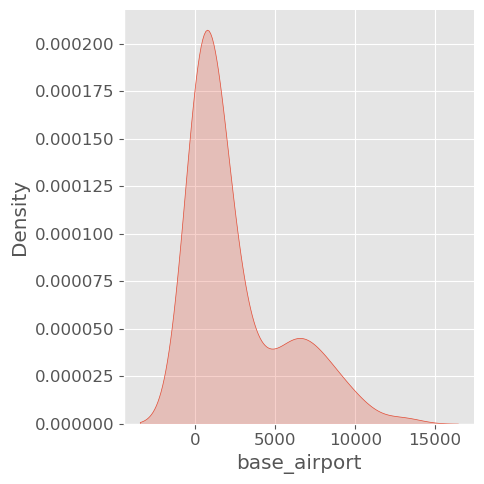

In [23]:
plot_distribution(airline_df, x='base_airport', kind='kde', legend=True, palette='deep', fill=True)

Airplane Dataframe Exploration

In [24]:
get_unique(airplane_df, 'airplane_id', dropna=False)

5583

In [25]:
get_unique(airplane_df, 'type_id', dropna=False)

13

In [26]:
data_summary(airplane_df, col='capacity', exclude='object')

count    5583.00000
mean      242.04102
std       179.52563
min        50.00000
25%        95.00000
50%       150.00000
75%       380.00000
max       644.00000
Name: capacity, dtype: float64

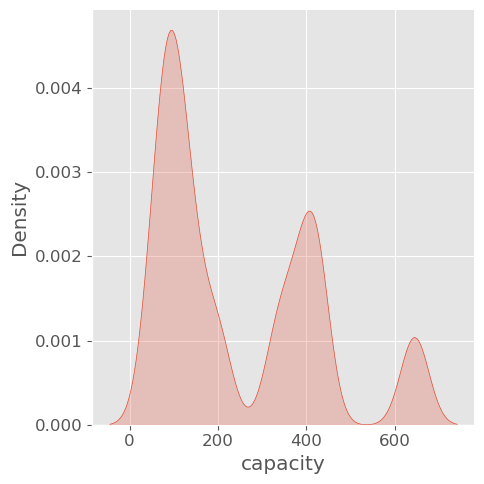

In [27]:
plot_distribution(airplane_df, kind='kde', legend=True, palette='deep', x='capacity', fill=True)

Airplane Type Dataframe Exploration

In [28]:
get_unique(airplane_type_df, 'type_id', dropna=False)

342

In [29]:
get_unique(airplane_type_df, 'identifier', dropna=False)

342

Airplot Dataframe Exploration

In [30]:
airport_df

,airport_id,iata,icao,name
0,1,LCG,LECO,A CORUNA
1,2,\N,7Y7,A R S SPORT STRIP
2,3,TID,DAOB,A. BOUSSOUF AIN BOUCHEKIF
3,4,DIR,HADR,A.T.D. YILMA INTL
4,5,QUN,RKNC,A-306
...,...,...,...,...
9849,13593,EVN,UGEE,ZVARTNOTS
9850,13594,\N,HLZW,ZWARA
9851,13595,\N,EBZW,ZWARTBERG
9852,13596,\N,EDRZ,ZWEIBRUCKEN


In [31]:
get_unique(airport_df, 'iata', False)

5614

In [32]:
# replace text
airport_df['iata'] = airport_df['iata'].replace({r'\N': np.nan})
airport_df['iata']

0       LCG
1       NaN
2       TID
3       DIR
4       QUN
       ... 
9849    EVN
9850    NaN
9851    NaN
9852    NaN
9853    NaN
Name: iata, Length: 9854, dtype: object

Airport Geo Dataframe Exploration

In [33]:
get_unique(airport_geo_df, 'airport_id', False)

9854

In [34]:
data_summary(airport_geo_df, 'name', include='object')

count         9854
unique        9691
top       AEROCLUB
freq             4
Name: name, dtype: object

In [35]:
data_summary(airport_geo_df, 'city', include='object')

count        9851
unique       8831
top       HOUSTON
freq           11
Name: city, dtype: object

In [36]:
# drop geolocation column
airport_geo_df.drop(columns=['geolocation'], inplace=True)
airport_geo_df.head()

,airport_id,name,city,country,latitude,longitude
0,1,A CORUNA,A CORUNA,SPAIN,43.30194,-8.37722
1,2,A R S SPORT STRIP,BELLE PLAINE,UNITED STATES,44.66667,-93.78361
2,3,A. BOUSSOUF AIN BOUCHEKIF,TIARET,ALGERIA,35.34139,1.46694
3,4,A.T.D. YILMA INTL,DIRE DAWA,ETHIOPIA,9.61417,41.86000
4,5,A-306,CHUNCHON,KOREA,37.88500,127.71500


Booking Dataframe Exploration

In [37]:
get_unique(booking_df, 'booking_id', False)

54304619

In [38]:
get_unique(booking_df, 'flight_id', False)

462553

In [39]:
get_unique(booking_df, 'seat', False)

866

In [40]:
# text processing
booking_df['seat'] = booking_df['seat'].replace({r'\N': np.nan})
booking_df['seat']

0           NaN
1           25F
2           25E
3           24D
4           24G
           ... 
54304614    11A
54304615     4G
54304616     8B
54304617     9F
54304618     5F
Name: seat, Length: 54304619, dtype: object

In [41]:
data_summary(booking_df, 'price', include=np.number)

count    5.43046e+07
mean     2.50984e+02
std      1.44282e+02
min      1.00000e+00
25%      1.26060e+02
50%      2.51010e+02
75%      3.75870e+02
max      5.01000e+02
Name: price, dtype: float64

Employee Dataframe Exploration

In [42]:
get_unique(employee_df, 'employee_id', False)

1000

In [43]:
get_unique(employee_df, 'firstname', False)

632

In [44]:
get_unique(employee_df, 'lastname', False)

857

In [45]:
data_summary(employee_df, 'sex', include='object')

count     1000
unique       2
top          m
freq       815
Name: sex, dtype: object

In [46]:
data_summary(employee_df, 'salary', include=np.number)

count    1000.00000
mean     1824.25039
std       538.72264
min      1000.86000
25%      1408.91500
50%      1762.46000
75%      2223.15250
max      2998.88000
Name: salary, dtype: float64

In [47]:
data_summary(employee_df, 'department', include='object')

count         1000
unique           5
top       Flugfeld
freq           214
Name: department, dtype: object

In [48]:
# drop unwanted columns
employee_df.drop(columns=['username', 'password'], inplace=True)

In [49]:
employee_df.head()

,employee_id,firstname,lastname,birthdate,sex,street,city,zip,country,emailaddress,telephoneno,salary,department
0,1,Michael,Ryo,1973-01-22,m,Rosenweg 78,Unterthiergrub,4162,Spain,Reggie.Barlow@cvcpaging.com,04055 81801638,1431.93,Buchhaltung
1,2,Rob,Zettler,1968-04-08,m,Halsmarter 5,Muckendorf an der Donau,3424,United States,Patricia.Arquette@orange.net,04131 97082561,1781.48,Buchhaltung
2,3,David,Thomas,1983-07-19,m,Neumarkter Straße 63,Walterschlag,3970,Algeria,Fedor.Tyutin@correo.movistar.net,08726 4534450,1960.80,Logistik
3,4,Lance,Leslie,1976-11-05,m,Vögelsbergweg 35,Kleintal,8124,Ethiopia,Tom.Matijacic@mycellone.com,0308 38840119,1224.95,Logistik
4,5,Jonathan Taylor,Thomas,1981-09-04,m,Lorettoweg 27,Zedroß,9342,Korea,Dorian.Velinov@omnipointpcs.com,01377 38233600,1624.84,Flugfeld


In [50]:
count_unique(employee_df, col='sex', normalize=False, ascending=False)

m    815
f    185
Name: sex, dtype: int64

In [51]:
count_unique(employee_df, col='department', normalize=False, ascending=False)

Flugfeld       214
Marketing      208
Logistik       202
Buchhaltung    189
Management     187
Name: department, dtype: int64

In [52]:
count_unique(employee_df, col='country', normalize=False, ascending=False)[:10]

United States    293
Brazil            73
Canada            45
Germany           43
France            35
Australia         28
Madagascar        20
Argentina         20
Mexico            17
Sweden            16
Name: country, dtype: int64

In [53]:
data_summary(employee_df, col='salary')

count    1000.00000
mean     1824.25039
std       538.72264
min      1000.86000
25%      1408.91500
50%      1762.46000
75%      2223.15250
max      2998.88000
Name: salary, dtype: float64

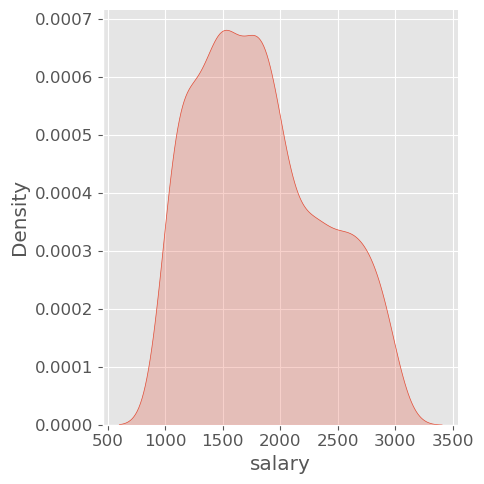

In [54]:
plot_distribution(employee_df, kind='kde', legend=True, palette='deep', x='salary', fill=True)

Flights Dataframe Exploration

In [55]:
get_unique(flight_df, col='flight_id', dropna=False)

462553

In [56]:
get_unique(flight_df, col='airline_id', dropna=False)

113

Passengers Dataframe Exploration

In [57]:
get_unique(passengerdetails_df, col='sex', dropna=False)

2

In [58]:
count_unique(passengerdetails_df, col='sex', normalize=False, ascending=False)

m    28752
w     7343
Name: sex, dtype: int64

In [59]:
data_summary(passengerdetails_df, col='city')

count     36095
unique    12767
top        Grub
freq         53
Name: city, dtype: object

In [60]:
count_unique(passengerdetails_df, col='country', normalize=False, ascending=False)[:10]

United States     13878
Canada             2347
Brazil             1628
Germany            1221
France             1157
Australia           946
Congo               768
Argentina           618
United Kingdom      567
Mexico              525
Name: country, dtype: int64

Weather Dataframe Exploration

In [61]:
count_unique(weather_df, normalize=False, ascending=False, col='weather')

Regen                   1611684
\N                      1453600
Schneefall               464056
Regen-Schneefall         416776
Regen-Gewitter           367284
Nebel                    141436
Nebel-Regen              129820
Nebel-Schneefall          21580
Nebel-Regen-Gewitter      18688
Gewitter                   1508
Name: weather, dtype: int64

In [62]:
# text processing
weather_df['weather'] = weather_df['weather'].replace({r'\N': np.nan})
weather_df['weather'].value_counts()

Regen                   1611684
Schneefall               464056
Regen-Schneefall         416776
Regen-Gewitter           367284
Nebel                    141436
Nebel-Regen              129820
Nebel-Schneefall          21580
Nebel-Regen-Gewitter      18688
Gewitter                   1508
Name: weather, dtype: int64

In [63]:
get_unique(weather_df, col='station', dropna=False)

4

# Load Data Into Database

In [64]:
conn = None
cur = None

arguments = {
              'user': 'postgres',
              'password': password,
              'host': 'localhost',
              'database': 'airport_db',
               'port': 5432
             }

try:
  # connect to postgres DB
  conn = psycopg2.connect(**arguments)

  # open a cursor to perform database operations
  cur = conn.cursor()

  # create and insert airline dataframe into database
  create_airline_table = ''' CREATE TABLE IF NOT EXISTS airline (
                                                                  airline_id int NOT NULL PRIMARY KEY,
                                                                  iata varchar(40),
                                                                  airlinename  varchar(200),
                                                                  base_airport int
                                                                )
                          '''
  
  insert_airline_data = '''INSERT INTO airline (airline_id, iata, airlinename, base_airport) VALUES (%s, %s, %s, %s)'''

  # Execute a query
  cur.execute(create_airline_table)

  # commit changes in database
  conn.commit()
except Exception as error:
  print(error)
finally:
  # close cursor and connection
  if cur is not None:
    cur.close()
  if conn is not None:
    conn.close()